## Analyzing Model Performance Assignment
In this assignment you will train a logistic regression model to make predictions in a binary classification context. We will use the [Statlog Shuttle](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29) dataset from UCI.

### The Dataset
Each record contains 9 numerical attributes. The response is actually multiclass with 7 classes/outcomes, but you will convert the response into a binary one before building our logistic regression models.

### 1. Import necessary packages

For this exercise we need

 - pandas
 - train_test_split
 - LogisticRegression
 - pyplot from matplotlib
 - KNeighborsClassifier
 - LogisticRegressionClassifier
 - RandomForestClassifier
 - DummyClassifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 2. Load and prepare the dataset


1.   Load the training data into a dataframe named **df_train_data**.
2.   Convert the multiclass response into a binary one. The multiclass response has 7 outcomes, encoded 1, 2, 3....6, 7; assume our binary classification goal is to predict whether the outcome is "1" or "not 1" (i.e. 2, 3,...6, 7).
3.   Create a dataframe containing all 9 features named **X**.
4.   Create a dataframe of labels named **y**.
5.   Split the data into a training set and a test set. We recommend using sklearn's train_test_split() function.

In [2]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

df_train_data[9] = np.where(df_train_data[9] == 1, 1, 0)

X = df_train_data.drop([9], axis=1)

y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))


There are 10875 training samples and 3625 test samples


In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8
8065,37,0,79,1,-6,0,42,86,44
8438,44,1,86,1,44,1,42,42,0
3188,49,0,83,-1,50,-1,34,34,0
5787,49,2,81,0,50,0,31,32,0
6503,80,0,84,-2,-36,0,4,120,116


### 3. Create the model


1.   Instantiate a Logistic Regression classifier with the default solver (`lbfgs`) and no regularization. To avoid convergence-related warnings, set the maximum number of iterations to 1000.
2.   Fit the classifier to the data and print out the estimated coefficients.

In [4]:
lr = LogisticRegression(penalty='none', max_iter=1000)
lr.fit(X_train, y_train)
lr.coef_

array([[ 0.18253089,  0.00196231, -0.23473773,  0.02811305, -0.46596238,
        -0.00200277,  1.04863074, -0.87140713,  0.20560984]])

### 4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [5]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.972


### 5. Dummy Classifier
Train a dummy classifier that always predicts the most frequently occurring class in the training set.

*Compare this result to the result of the logistic regression classifier above. What does this result suggest about our logistic regression model?*

In [6]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
round(dummy.score(X_test, y_test), 3)

0.792

### 6. Confusion Matrix
Print the confusion matrix.


In [7]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[ 689   64]
 [  39 2833]]


In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### 7. Plot a nicer confusion matrix (optional)
Use the *plot_confusion_matrix* function from above to plot a nicer looking confusion matrix.

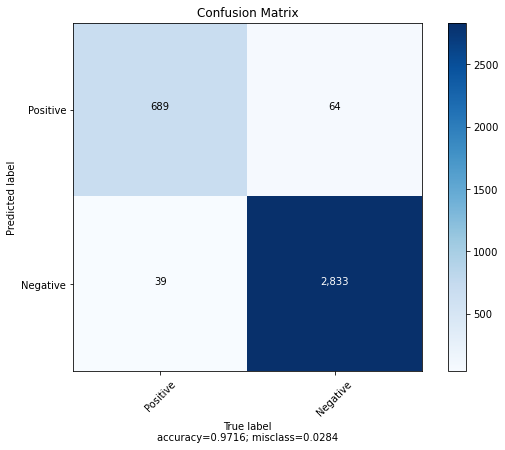

In [9]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)


### 8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [10]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 0.98
Recall score: 0.99
F1 score: 0.98
Fbeta score favoring precision: 0.98
FBeta score favoring recall: 0.98


### 9. Print a classification report

In [11]:
report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93       753
    Positive       0.98      0.99      0.98      2872

    accuracy                           0.97      3625
   macro avg       0.96      0.95      0.96      3625
weighted avg       0.97      0.97      0.97      3625



### 10. Plot ROC Curve and AUC
 Caculate AUC and plot the curve.


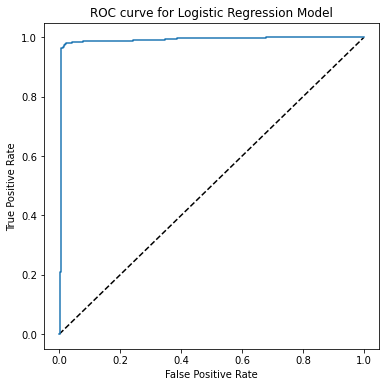

Area under the ROC curve: 0.990


In [12]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

### 11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

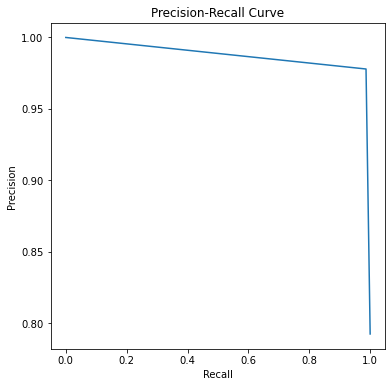

In [13]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### 12. Parameter Tuning
Tune the regularization parameter *C* using grid search. Use an L2 penalty in your model and try values of *C* ranging from 0.01 to 0.5 in increments of 0.01 (but otherwise use the same solver and maximum iterations as before). Print out the value of *C* that produces the best test set accuracy score. 

Your answer may differ from the one below if your train/test split is different from ours, but don't worry about that as long as your process for tuning C is reasonable.

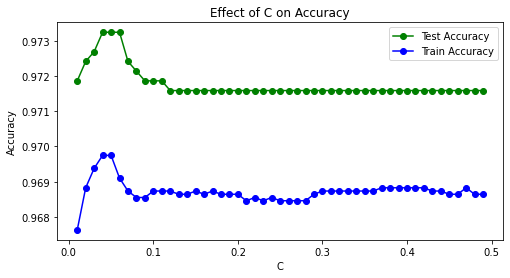

In [14]:
c_vals = np.arange(0.01, 0.5, 0.01)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [15]:
best_test_accuracy = max(test_accuracy)

print(f"Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")

Best value for C: 0.04
Best test accuracy: 0.973


### 13. Cross Validation
Perform 5-fold cross validation on your logistic regression model, using the original parameters (no regularization). Print the 5 accuracy scores and the mean cross-validation score.

In [16]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.96137931 0.97057471 0.97103448 0.96827586 0.96689655]
Mean cross validation score: 0.968
